### 高斯核
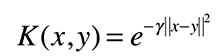

### 高斯函数
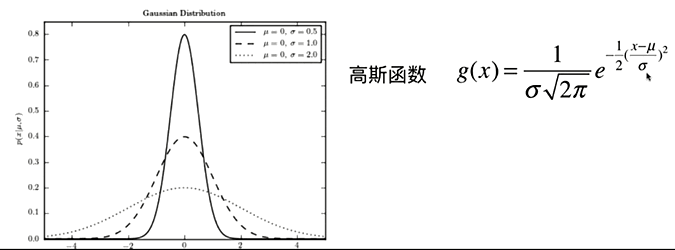

gamma越大，高斯分布越窄
gamma越小，高斯分布越宽

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

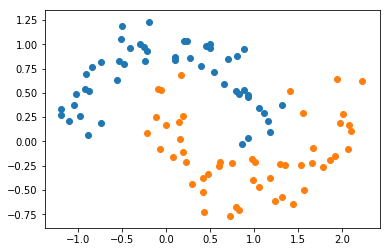

In [3]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [5]:
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [6]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

绘制决策边界

In [7]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF69D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, camp=custom_camp)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


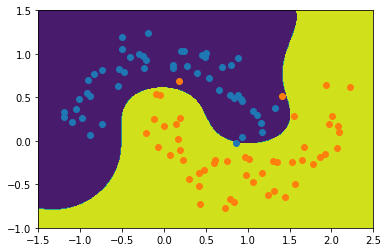

In [8]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

对gamma进行调节，来客观的观察对结果的影响

In [9]:
svc_gamma100 = RBFKernelSVC(gamma=100.0)
svc_gamma100.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


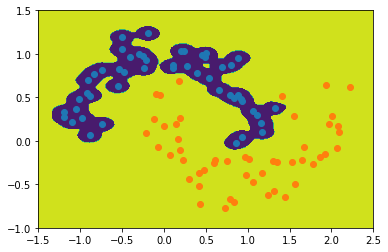

In [10]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

回忆公式，gamma越大，图形月高瘦

可以看出，在每一个数据点周围都形成了钟型图案,可以想象成在进行俯视这个图案，每个样本相当于图形的一个颠, 这个明显过拟合了

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


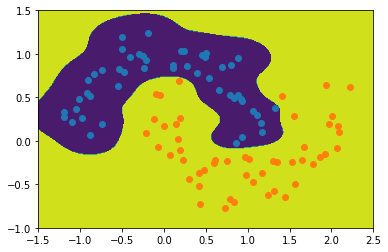

In [11]:
svc_gamma10 = RBFKernelSVC(gamma=10.0)
svc_gamma10.fit(X, y)
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

gamma在进行减小，对其进行观察和

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


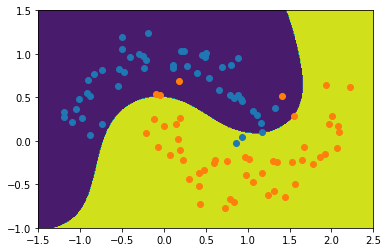

In [12]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X, y)
plot_decision_boundary(svc_gamma05, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

更极端的进行观察

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'camp'
  s)


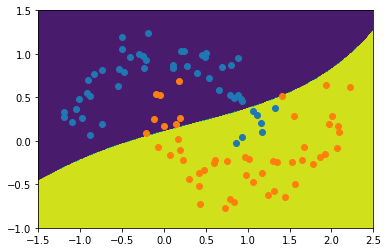

In [13]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

这个明显已经欠拟合了，已经不能进行分类了